# 绘图: matplotlib Basemap简介

作者：Vamei
出处：http://www.cnblogs.com/vamei 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from StringIO import StringIO

major_city=StringIO('''\
Shanghai 23019148  31.23N  121.47E  China
Mumbai   12478447  18.96N  72.82E   India
Karachi  13050000  24.86N  67.01E   Pakistan
Delhi    16314838  28.67N  77.21E   India
Manila   11855975  14.62N  120.97E  Philippines
Seoul    23616000  37.56N  126.99E  Korea(South)
Jakarta  28019545   6.18S  106.83E  Indonesia
Tokyo    35682460  35.67N  139.77E  Japan
Peking   19612368  39.91N  116.39E  China''')

In [3]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#============================================# read data
names = []
pops  = []
lats  = []
lons  = []
countries = []
for line in major_city:
    info = line.split()
    names.append(info[0])
    pops.append(float(info[1]))
    lat  = float(info[2][:-1])
    if info[2][-1] == 'S': lat = -lat
    lats.append(lat)
    lon  = float(info[3][:-1])
    if info[3][-1] == 'W': lon = -lon + 360.0
    lons.append(lon)
    country = info[4]
    countries.append(country)

/Users/ruwang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/ruwang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/ruwang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/ruwang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes

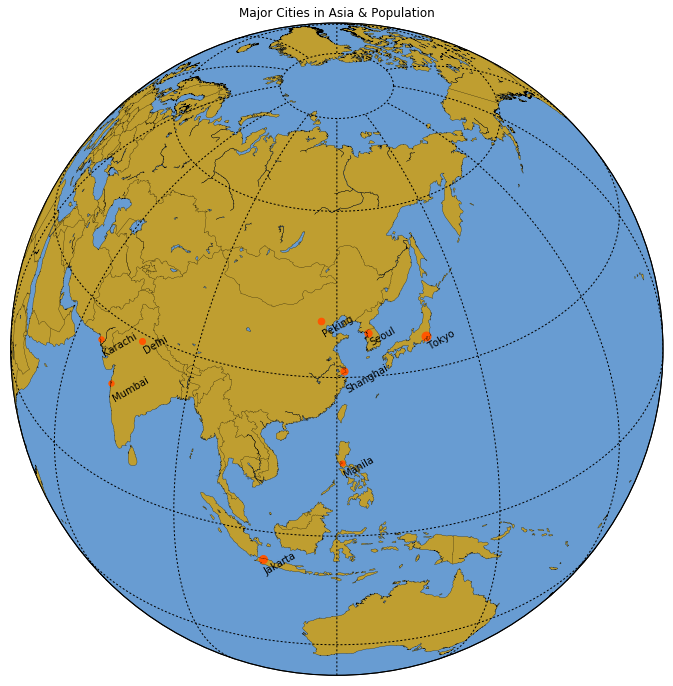

In [5]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
#============================================
# set up map projection with
# use low resolution coastlines.
map = Basemap(ax=ax,projection='ortho',lat_0=35,lon_0=120,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='#689CD2')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# Fill continent wit a different color
map.fillcontinents(color='#BF9E30',lake_color='#689CD2',zorder=0)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons, lats)
max_pop = max(pops)
# Plot each city in a loop.
# Set some parameters
size_factor = 80.0
y_offset    = 15.0
rotation    = 30
for i,j,k,name in zip(x,y,pops,names):
    size = size_factor*k/max_pop
    cs = map.scatter(i,j,s=size,marker='o',color='#FF5600')
    plt.text(i,j+y_offset,name,rotation=rotation,fontsize=10)

plt.title('Major Cities in Asia & Population')